In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds

import numpy as np

In [2]:
def load_dataset():
    """Load dataset, we are using build-in 'natural_questions_open'"""
    (train_data, test_data), info = tfds.load("natural_questions_open", 
                                        split=(tfds.Split.TRAIN, tfds.Split.VALIDATION),
                                        with_info=True)
    return train_data, test_data, info


In [3]:
train_data, test_data, info = load_dataset()
print(train_data)
print(test_data)
print(info)


Shuffling and writing examples to /root/tensorflow_datasets/natural_questions_open/1.0.0.incompleteAIRSU4/natural_questions_open-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/natural_questions_open/1.0.0.incompleteAIRSU4/natural_questions_open-validation.tfrecord


Dataset natural_questions_open downloaded and prepared to /root/tensorflow_datasets/natural_questions_open/1.0.0. Subsequent calls will reuse this data.
<PrefetchDataset shapes: {answer: (None,), question: ()}, types: {answer: tf.string, question: tf.string}>
<PrefetchDataset shapes: {answer: (None,), question: ()}, types: {answer: tf.string, question: tf.string}>
tfds.core.DatasetInfo(
    name='natural_questions_open',
    version=1.0.0,
    description='The NQ-Open task, introduced by Lee et.al. 2019, is an open domain question answering benchmark that is derived from Natural Questions. The goal is to predict an English answer string for an input English question. All questions can be answered using the contents of English Wikipedia.',
    homepage='https://github.com/google-research-datasets/natural-questions/tree/master/nq_open',
    features=FeaturesDict({
        'answer': Sequence(tf.string),
        'question': tf.string,
    }),
    total_num_examples=91535,
    splits={
    

In [4]:
train_questions = []
train_answers = []

for ds in train_data: 
  train_questions.append(bytes.decode(ds['question'].numpy()))
  train_answers.append(bytes.decode(ds['answer'].numpy()[0]))
  
print(len(train_questions))
print(len(train_answers))
print(train_questions[:3])
print(train_answers[:3])

print(type(train_questions[0]))
print(type(train_answers[0]))


87925
87925
['who is the girl in more than you know', 'when does game over man come out on netflix', 'when was the rime of the ancient mariner written']
['Romi Van Renterghem.', 'March 23, 2018', '1797–98']
<class 'str'>
<class 'str'>


In [5]:
test_questions = []
test_answers = []

for ds in test_data:
  test_questions.append(bytes.decode(ds['question'].numpy()))
  test_answers.append(bytes.decode(ds['answer'].numpy()[0]))

print(len(test_questions))
print(len(test_answers))
print(test_questions[:3])
print(test_answers[:3])

print(type(test_questions[0]))
print(type(test_answers[0]))

3610
3610
['who played hyde in league of extraordinary gentlemen', 'who signed the largest on the declaration of independence', 'when was the last time the carolina hurricanes made the playoffs']
['Jason Flemyng', 'John Hancock', '2008–09']
<class 'str'>
<class 'str'>


In [6]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(oov_token="<oov>")
tokenizer.fit_on_texts(train_questions + train_answers)


In [7]:
word_index = tokenizer.word_index
total_words = len(word_index) + 1
print(word_index)
print(len(word_index))


{'<oov>': 1, 'the': 2, 'who': 3, 'in': 4, 'of': 5, 'when': 6, 'is': 7, 'did': 8, 'what': 9, 'was': 10, 'a': 11, 'to': 12, 'on': 13, 'does': 14, 'where': 15, 'and': 16, 'how': 17, 'first': 18, 'for': 19, 'come': 20, 'out': 21, 'played': 22, 'plays': 23, 'season': 24, 'many': 25, 'are': 26, 'last': 27, 'won': 28, 'world': 29, 'from': 30, 'most': 31, 'new': 32, 'has': 33, 'which': 34, '2018': 35, 'time': 36, 'song': 37, 'movie': 38, 'name': 39, 'wrote': 40, '2017': 41, 'you': 42, 'with': 43, 'that': 44, 'do': 45, 'i': 46, 'by': 47, 'sings': 48, 'start': 49, 'india': 50, 'at': 51, '2': 52, 'sang': 53, 'united': 54, 'us': 55, 'states': 56, 'be': 57, 'it': 58, 'cup': 59, 'as': 60, '1': 61, 'have': 62, 'episode': 63, 'take': 64, 'place': 65, 'state': 66, 'war': 67, 'game': 68, 'year': 69, 'play': 70, 'an': 71, 'made': 72, '3': 73, 'president': 74, 'there': 75, 'series': 76, 'one': 77, 'episodes': 78, 'or': 79, 'me': 80, 'voice': 81, 'called': 82, 'john': 83, 'american': 84, 'all': 85, '5': 86

In [8]:
train_question_sequences = tokenizer.texts_to_sequences(train_questions)
train_answer_sequences = tokenizer.texts_to_sequences(train_answers)
print(train_question_sequences[:5])
print(train_answer_sequences[:5])


[[3, 7, 2, 125, 4, 287, 659, 42, 648], [6, 14, 68, 192, 100, 20, 21, 13, 537], [6, 10, 2, 10999, 5, 2, 792, 12685, 195], [1456, 5, 165, 1153, 4, 1234, 5, 14968, 2435], [3, 10, 2, 281, 55, 74, 2332, 8151, 10, 1629, 74]]
[[22930, 891, 22931], [129, 540, 35], [22932], [2761, 217], [1380, 1660]]


In [9]:
max_length = max([len(sq) for sq in train_question_sequences+train_answer_sequences])
print(f"max_length: {max_length}")


max_length: 22


In [10]:
test_question_sequences = tokenizer.texts_to_sequences(test_questions)
test_answer_sequences = tokenizer.texts_to_sequences(test_answers)
print(test_question_sequences[:5])
print(test_answer_sequences[:5])


[[3, 22, 2930, 4, 107, 5, 8205, 12138], [3, 1015, 2, 217, 13, 2, 894, 5, 434], [6, 10, 2, 27, 36, 2, 383, 9314, 72, 2, 387], [15, 10, 41, 350, 16, 2, 317, 105], [6, 14, 2, 130, 2480, 123, 20, 21]]
[[608, 23754], [83, 7540], [12393], [9607, 54, 527], [135, 113, 35]]


In [11]:
max_padded_length = int(max_length * 2 / 3)
print(f"{max_padded_length}")

train_question_padded = tf.keras.preprocessing.sequence.pad_sequences(
    train_question_sequences, maxlen=max_padded_length, padding="post"
)
test_question_padded = tf.keras.preprocessing.sequence.pad_sequences(
    train_question_sequences, maxlen=max_padded_length, padding="post"
)

train_answer_padded = tf.keras.preprocessing.sequence.pad_sequences(
    train_answer_sequences, maxlen=max_padded_length, padding="post"
)
test_answer_padded = tf.keras.preprocessing.sequence.pad_sequences(
    test_answer_sequences, maxlen=max_padded_length, padding="post"
)

print(len(train_question_padded))
print(len(test_question_padded))
print(len(train_answer_padded))
print(len(test_answer_padded))


14
87925
87925
87925
3610


In [12]:
def build_model():
  model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(input_dim=total_words,
                              output_dim=250,
                              input_shape=[None,]),  
    tf.keras.layers.Bidirectional(
        tf.keras.layers.LSTM(units=250, return_sequences=True)
    ),                                                  
    tf.keras.layers.Dense(units=200, 
                           activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(units=150, 
                           activation=tf.keras.activations.relu),  
    tf.keras.layers.Dropout(.1),                
    tf.keras.layers.Dense(units=total_words, 
                           activation=tf.keras.activations.relu) 
  ])
  
  model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=["accuracy"]
  )
  return model


In [13]:
model = build_model()
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 250)         12010500  
_________________________________________________________________
bidirectional (Bidirectional (None, None, 500)         1002000   
_________________________________________________________________
dense (Dense)                (None, None, 200)         100200    
_________________________________________________________________
dense_1 (Dense)              (None, None, 150)         30150     
_________________________________________________________________
dropout (Dropout)            (None, None, 150)         0         
_________________________________________________________________
dense_2 (Dense)              (None, None, 48042)       7254342   
Total params: 20,397,192
Trainable params: 20,397,192
Non-trainable params: 0
____________________________________________

In [14]:
def predict_on_model(model, tokenizer, max_len, text, answer):
  sequences = tokenizer.texts_to_sequences([text])
  padded = np.asarray(tf.keras.preprocessing.sequence.pad_sequences(
              sequences, 
              maxlen=max_len, 
              padding="post"
          ))
  
  predicted = model.predict(padded)
  predicted = np.argmax(predicted, axis=-1),
  predicted = tokenizer.sequences_to_texts(predicted[0])

  print(f"Q: {text}")
  print(f"A: {answer}")
  print(f"Guess: {predicted[0]}")


In [23]:
def predict_on_test(count=1):
  for _, text, answer in zip(range(3), test_questions, test_answers):
    predict_on_model(model, tokenizer, max_padded_length, text, answer)
    print()

predict_on_test()

Q: who is the girl in more than you know
A: Romi Van Renterghem.
Guess: <oov> <oov> <oov> <oov> <oov> <oov> <oov> <oov> <oov> <oov> <oov> <oov> <oov> <oov>

Q: when does game over man come out on netflix
A: March 23, 2018
Guess: <oov> <oov> <oov> <oov> <oov> <oov> <oov> <oov> <oov> <oov> <oov> <oov> <oov> <oov>

Q: when was the rime of the ancient mariner written
A: 1797–98
Guess: <oov> <oov> <oov> <oov> <oov> <oov> <oov> <oov> <oov> <oov> <oov> <oov> <oov> <oov>



In [16]:
history = model.fit(x=train_question_padded,
          y=train_answer_padded,
          epochs=50)


Epoch 1/50
2748/2748 [==============================] - 217s 78ms/step - loss: 1.8673 - accuracy: 0.8439
Epoch 2/50
2748/2748 [==============================] - 213s 78ms/step - loss: 1.8141 - accuracy: 0.8465
Epoch 3/50
2748/2748 [==============================] - 213s 78ms/step - loss: 1.9006 - accuracy: 0.8464
Epoch 4/50
2748/2748 [==============================] - 213s 78ms/step - loss: 2.5049 - accuracy: 0.8463
Epoch 5/50
2748/2748 [==============================] - 214s 78ms/step - loss: 2.2914 - accuracy: 0.8462
Epoch 6/50
2748/2748 [==============================] - 213s 78ms/step - loss: 2.3614 - accuracy: 0.8465
Epoch 7/50
2748/2748 [==============================] - 215s 78ms/step - loss: 2.4194 - accuracy: 0.8464
Epoch 8/50
2748/2748 [==============================] - 215s 78ms/step - loss: 2.5151 - accuracy: 0.8464
Epoch 9/50
2748/2748 [==============================] - 215s 78ms/step - loss: 2.4456 - accuracy: 0.8466
Epoch 10/50
2748/2748 [==============================] 

In [17]:
import matplotlib.pyplot as plt

def plot(history, m, label, title):
  #plt.clf()   

  v = history[m]
  epochs = range(1, len(v) + 1)
  plt.plot(epochs, v, 'b', label=label)
  plt.title(title)
  plt.xlabel('Epochs')
  plt.ylabel(label)
  plt.legend()

  plt.show()


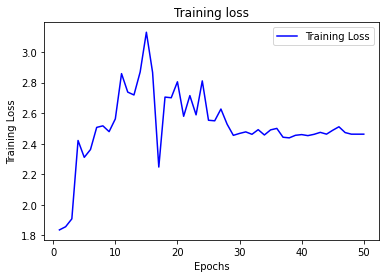

In [18]:
plot(history.history, "loss", 'Training Loss', 'Training loss')


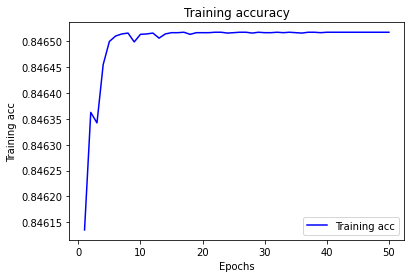

In [19]:
plot(history.history, "accuracy", 'Training acc', 'Training accuracy')


In [20]:
model.evaluate(x=test_question_padded[:len(test_answer_padded)], y=test_answer_padded)

113/113 [==============================] - 3s 18ms/step - loss: 2.5087 - accuracy: 0.8425


[2.5087146759033203, 0.8424811959266663]

In [21]:
predict_on_test(10)

Q: who played hyde in league of extraordinary gentlemen
A: Jason Flemyng
Guess: <oov> <oov> <oov> <oov> <oov> <oov> <oov> <oov> <oov> <oov> <oov> <oov> <oov> <oov>

Q: who signed the largest on the declaration of independence
A: John Hancock
Guess: <oov> <oov> <oov> <oov> <oov> <oov> <oov> <oov> <oov> <oov> <oov> <oov> <oov> <oov>

Q: when was the last time the carolina hurricanes made the playoffs
A: 2008–09
Guess: <oov> <oov> <oov> <oov> <oov> <oov> <oov> <oov> <oov> <oov> <oov> <oov> <oov> <oov>

